# Arrays and Plots

In [5]:
# array type and vectorized functions
import numpy as np
import numpy.typing as npt

# plotting
import matplotlib.pyplot as plt

## numpy arrays

create the points for a function
>f(x) = x^2

5 points in [0,1]

In [6]:
f = lambda x : (x * x)
n = 5
dx = 1.0 / (n - 1)

### from python lists

In [7]:
x_arr = np.array([(x*dx) for x in range(n)])
y_arr = np.array([f(x) for x in x_arr])

### from scratch

In [8]:
# places n points in [0,1]
x_arr = np.linspace(0, 1, n)  

# zero initialized array with len=n
y_arr = np.zeros(n)           
for idx, val in enumerate(x_arr):
    y_arr[idx] = f(val)

# faster way to create y_arr
y_arr2 = f(x_arr)

In [9]:
def print_points(x_arr:npt.ArrayLike, y_arr:npt.ArrayLike) -> None:
    for ind, (x, y) in enumerate(zip(x_arr, y_arr)):
        print(f"x[{ind}] = {x:>7.6f}\ty[{ind}] = {y:>7.6f}")

print_points(x_arr, y_arr)

x[0] = 0.000000	y[0] = 0.000000
x[1] = 0.250000	y[1] = 0.062500
x[2] = 0.500000	y[2] = 0.250000
x[3] = 0.750000	y[3] = 0.562500
x[4] = 1.000000	y[4] = 1.000000


## Vectorized Functions

Example function:
> **f (x) = (e^(−x)) * sin(2πx)**

To write a vectorized function only use:

* basic operators (+ - * / **)
* np.operators
* np.constants

*vectorized functions work on numpy arrays (as well as on scalars)*

In [10]:
def f(x:npt.ArrayLike) -> npt.ArrayLike:
    """f as a vectorized function"""
    return (np.exp(-x)) * np.sin(2 * np.pi * x)

n = 10
x = np.linspace(0,4,n)
y = f(x)

print_points(x,y)


x[0] = 0.000000	y[0] = 0.000000
x[1] = 0.444444	y[1] = 0.219297
x[2] = 0.888889	y[2] = -0.264258
x[3] = 1.333333	y[3] = 0.228282
x[4] = 1.777778	y[4] = -0.166446
x[5] = 2.222222	y[5] = 0.106722
x[6] = 2.666667	y[6] = -0.060174
x[7] = 3.111111	y[7] = 0.028637
x[8] = 3.555556	y[8] = -0.009770
x[9] = 4.000000	y[9] = -0.000000


## Plotting

Example function:
> **f (x) = (e^(−x)) * sin(2πx)** for x ∈ [0, 4]*

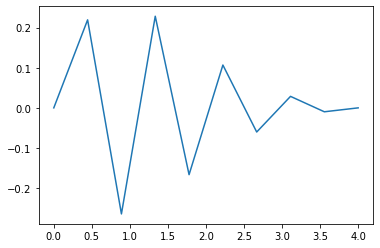

In [11]:
plt.plot(x, y)
plt.show()

### Some more functions


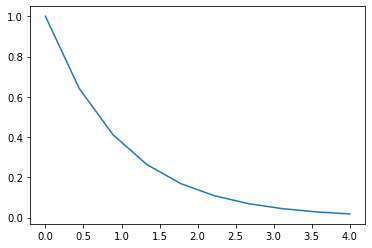

In [13]:

g = lambda x: np.exp(-x)

xa = np.linspace(0,4,10)
ya = g(x)

plt.plot(xa, ya, label="exponential function")
plt.show()


f(x) = e^-x

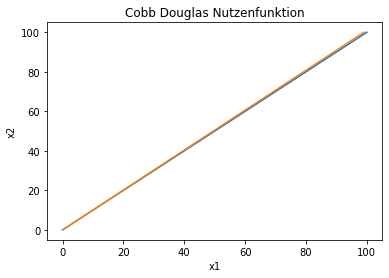

In [34]:
def cobb_douglas(x1, x2):
    return (x1 ** .5) * (x2 ** .5)

x1, x2 = np.linspace(0,100, 100), np.linspace(0,100, 100)
y = cobb_douglas(x1, x2)

plt.plot(x1, x2, y)
plt.title("Cobb Douglas Nutzenfunktion")
plt.xlabel("x1")
plt.ylabel("x2")
plt.savefig("cd.png")

plt.show()

y = x1^0.5 * x2^0.5

## Discrete Functions

In [1]:
def heaviside(x):
    if x < 0:
        return 0
    return 1

In [7]:
x = np.linspace(-10,10,5)
# y = heaviside(x)  -> doesnt work! truth value of an array with len > 1 is ambigous
# -> it tests something like this: [True, False, False , True] == True

#### Solution 1: Traditional For loop

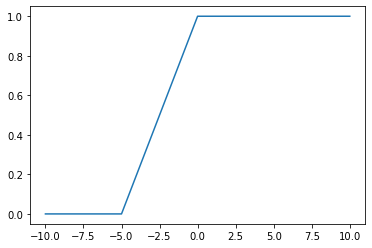

In [11]:
y = np.zeros(5)

# traditional for loop assignment
for ind,elem in enumerate(x):
    y[ind] = heaviside(elem)

# or modification of function
def heaviside_vec(arr):
    ret = np.zeros(len(arr))
    for idx, elem in enumerate(arr):
        if elem < 0:
            ret[idx] = 0
        else:
            ret[idx] = 1
    return ret

y = heaviside_vec(x)
plt.plot(x, y)

##### alternative: np.vectorize()

> fv = np.vectorize(f)  

creates a vectorized function fv of non-vectorized function f

* This function shouldnt be overused, it usefull just for converting scalar based functions using if tests

In [13]:
f = np.vectorize(heaviside)
y = f(x)

All prior options are slow!

### Solution: np.where()

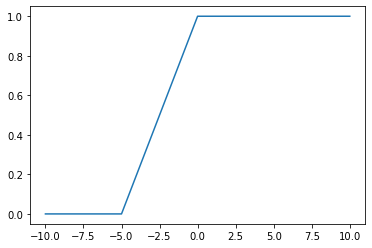

In [22]:
x = np.linspace(-10,10,5)

def ret_arr(x_arr):
    return np.where(x<0, 0, 1) # args: (wenn,dann,sonst)

f = lambda x_arr : np.where(x<0 ,0, 1)

plt.plot(x,f(x))

## Plotting Sequences

how to turn multiple plots into a video sequence?

In [14]:
def gauss_bell(x, m, s):   # val, mean, std_deviation
    return (
        (1 / np.sqrt(2 * np.pi)) * (1 / 2) *
        np.exp(
            (- 1 / 2) * (((x - m) / s) ** 2)
        )
    )

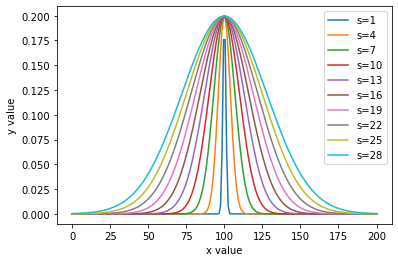

In [15]:
fig, ax = plt.subplots()

m = 100
x_arr = np.linspace(0,200, 200)


for stddev in range(1,30,3):
    
    y_arr = gauss_bell(x_arr, m, stddev)
    ax.plot(x_arr, y_arr, label=f"s={stddev}")

ax.set_xlabel("x value")
ax.set_ylabel("y value")
ax.legend()


**Book**: Introduction to scientific programming  
**Page**: 92